In [1]:
#specify imports here
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
from scipy import integrate
import math
%matplotlib notebook

In [2]:
t, N, N_error = np.loadtxt('data/decay_data.txt', unpack=True)
fig = plt.figure('Decay Data w/error bars')
axes = fig.add_axes([0.15,0.15,0.8,0.8])
axes.errorbar(t, N, yerr = N_error, fmt='.', color = 'lawngreen')
axes.set_xlabel('time (d)')
axes.set_ylabel('Particles');

<IPython.core.display.Javascript object>

In [81]:
def get_chi_squared(t,N,N_error,params):
    RR = 1.0
    for i in range(len(t)):
        y_prime = (params[0]*(np.exp(-t[i]/params[1])))+params[2]
        RR = RR + ((N[i] - y_prime)/N_error[i])**2
    return RR

In [82]:
steps = 10000
init_par = np.array([1.0,1.0,1.0])
par_list, RRs = [init_par], [get_chi_squared(t, N, N_error, init_par)]
#print(RRs)
for i in range(steps):
    test_par = [np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5),np.random.normal(par_list[-1][2],0.5)]
    RR_test = get_chi_squared(t,N,N_error,test_par)
    bol = (np.random.random() <= (RRs[-1])/RR_test)
    if bol:
        par_list.append(test_par)
        RRs.append(RR_test)
    else:
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])

<ipython-input-81-731910938dfd>:6: RuntimeWarning: overflow encountered in double_scalars
  RR = RR + ((N[i] - y_prime)/N_error[i])**2
<ipython-input-81-731910938dfd>:5: RuntimeWarning: overflow encountered in exp
  y_prime = (params[0]*(np.exp(-t[i]/params[1])))+params[2]
<ipython-input-81-731910938dfd>:5: RuntimeWarning: overflow encountered in double_scalars
  y_prime = (params[0]*(np.exp(-t[i]/params[1])))+params[2]


In [83]:
RR_min = np.amin(RRs) 
chisq = RR_min
best_i = RRs.index(RR_min)
best_pars = par_list[best_i]
print("best m = {0}\nbest b = {1}\nchi2 = {2}\nindex = {3}".format(best_pars[0], best_pars[1], RR_min, best_i) )

best m = 2.11715000015774
best b = 3.415066277645698
chi2 = 119.25950997567357
index = 4299


In [84]:
dof = len(t) - len(init_par) - 1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
print('Fit Results:\n')
print(' chi2 = ',chisq,'\n dof = ', dof, '\n reduced chi2 = ', chisq/dof, '\n p-value = ',pvalue)

Fit Results:

 chi2 =  119.25950997567357 
 dof =  96 
 reduced chi2 =  1.2422865622465997 
 p-value =  0.05405942857044433


<IPython.core.display.Javascript object>


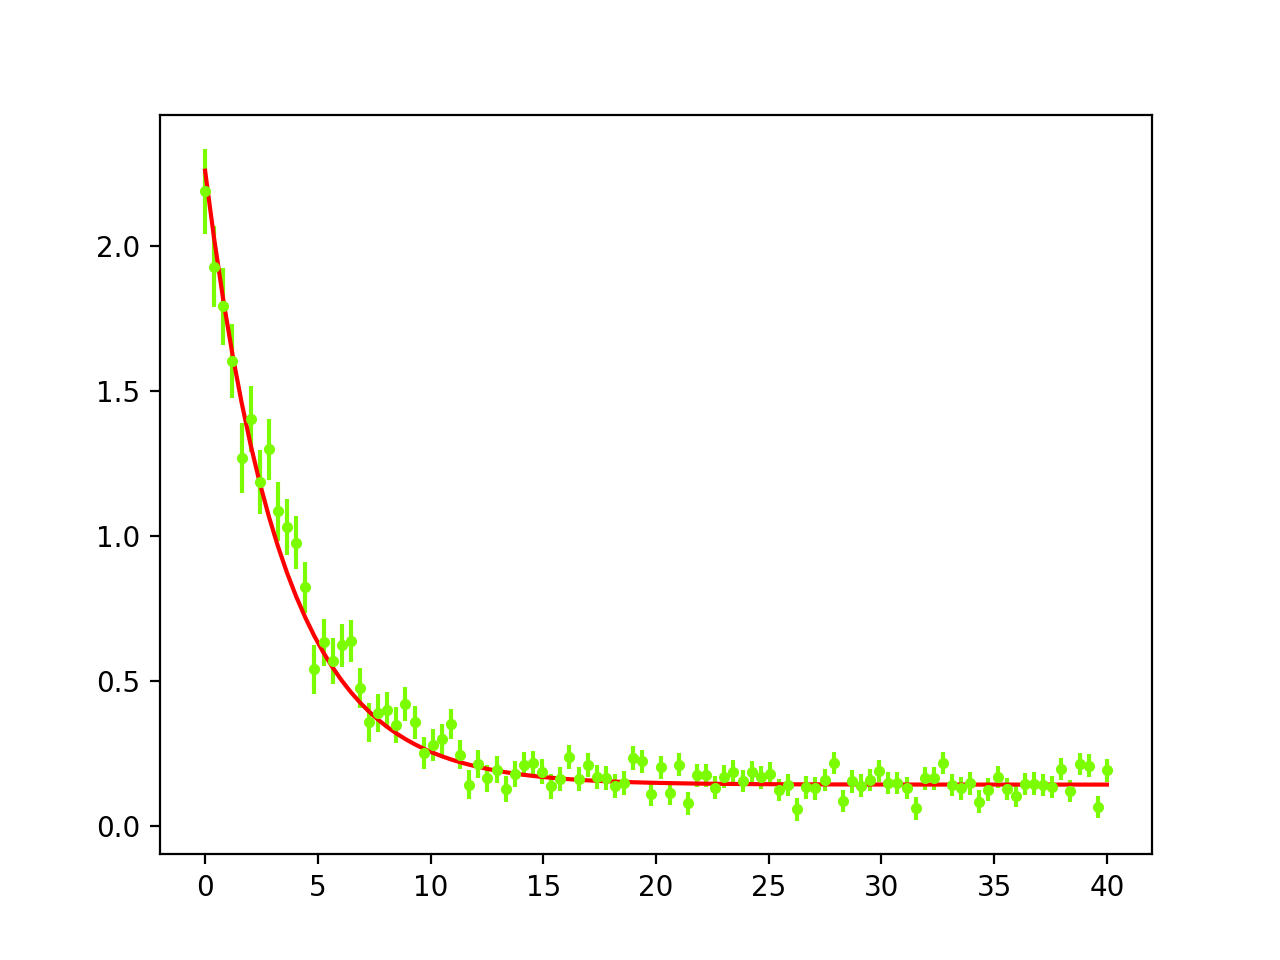

In [85]:
def guassian_func(t,p0,p1,p2): 
    return (p0*(np.exp(-t/p1)))+p2
fig = plt.figure('Fitted Decay Data')
plt.errorbar(t,N,N_error,fmt='.',color='lawngreen')
plt.plot(t,guassian_func(t,*best_pars),'red');